# Phase 2 - Model Training

In [1]:
# Importing the modules 
import pandas as pd
from sklearn.model_selection import train_test_split

## Reading the Cleaned Data form the CSV file

In [2]:
df = pd.read_csv("src/CleanedData.csv")
df = df.reset_index(drop=True) 

## Spliting the data into 2-parts
* X -  Contains all the features of the data.
* Y - Contains the lables of the data.

In [3]:
X = df.drop(columns=['Label'])
Y = df['Label']

## Dividing the Data into 80% and 20% sub groups
* X_train, Y_train contains 80% of the features and labels respectively. `used for training the model`
* X_test, Y_test contains 20% of the features and labels respectively. `used for testing the model`

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print(f"Shape of Trainning Data X = {X_train.shape}, Y = {Y_train.shape}")
print(f"Shape of Testing Data Y = {X_test.shape}, Y = {Y_test.shape}")

Shape of Trainning Data X = (557378, 20), Y = (557378,)
Shape of Testing Data Y = (139345, 20), Y = (139345,)


## Plotting the Data to visualize the distribution

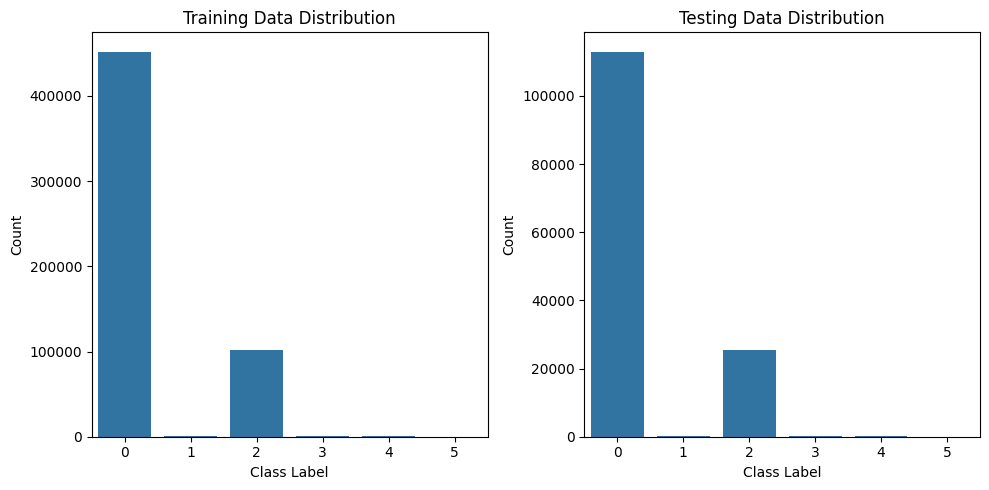

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Training set distribution
plt.subplot(1, 2, 1)
sns.countplot(x=Y_train)
plt.title("Training Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")

# Testing set distribution
plt.subplot(1, 2, 2)
sns.countplot(x=Y_test)
plt.title("Testing Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Model Selection & Training

We will be using the `RandomForestClassifier` with 100 decision trees to train our model, as it performs well for classification tasks.

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## Predicting the corresponding lables using `X_test`

In [8]:
Y_pred = model.predict(X_test)

# Calculting the accurecy of the Model by comparing the values of `Y_test` and `Y_pred`

In [9]:
accurecy = accuracy_score(Y_test, Y_pred)
print("The accurecy score of the model is: ", accurecy)

The accurecy score of the model is:  0.9969284868491872


## Model Accuracy and Observations

The accuracy of the model is `0.9969` i.e., **99%**.

It appears that the model is overfitting on data labeled as `0` (BENIGN), since the dataset contains relatively fewer samples for other attack types. 

We can further examine the results during the testing phase to see how the model performs on real-world data.


In [10]:
# Saving the model
import joblib
joblib.dump(model, 'CyberSecurityModel.pkl')

['CyberSecurityModel.pkl']